## Permanent Magnet Synchronous Motor -- Stator,Rotor Temperature Detection

The permanent-magnet synchronous motor(PMSM) drive is one of the best choices for a full range of motion control applications. For example, the PMSM is widely used in robotics, machine tools, actuators, and it is being considered in high-power applications such as industrial drives and vehicular propulsion. It is also used for residential/commercial applications. The PMSM is known for having low torque ripple, superior dynamic performance, high efficiency and high power density.

<!-- 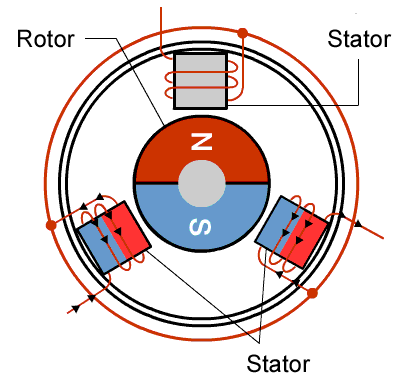 -->
<div>
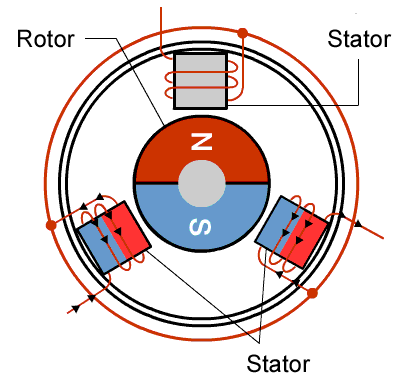
</div>

The main purpose of the data set's recording is to be able to model the stator and rotor temperatures of a PMSM in real-time. Due to the intricate structure of an electric traction drive, direct measurement with thermal sensors is not possible for rotor temperatures, and even in case of the stator temperatures, sensor outage or even just deterioration can't be administered properly without redundant modeling.

Target features:

    stator_yoke
    stator_winding
    stator_tooth
    pm(rotor)
Input features:

    The remaining features exclusive torque.
    Torque is a quantity, which is not reliably measurable in field applications, such that this feature shall be omitted.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df = pd.read_csv('measures_v2.csv')
df.head(3)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.08667,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.09239,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.08938,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17


## Exploratory Data Analysis

In [3]:
#check for null values
df.isna().sum() # There are no null values

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [4]:
#check for duplicate records
df.duplicated().any() # There are no duplicated records

False

In [5]:
#check the datatype of features
df.info() # All the features are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [6]:
#basic statistics on the dataset
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [7]:
#check the number of records and features
print('Records : {}'.format(df.shape[0]))
print('Features : {}'.format(df.shape[1]))

Records : 1330816
Features : 13


In [8]:
x = df.drop(columns = ['stator_winding','stator_tooth','pm','stator_yoke']) #dropped these columns since they are target features
y = df[['stator_winding','stator_tooth','pm','stator_yoke']]

<AxesSubplot:>

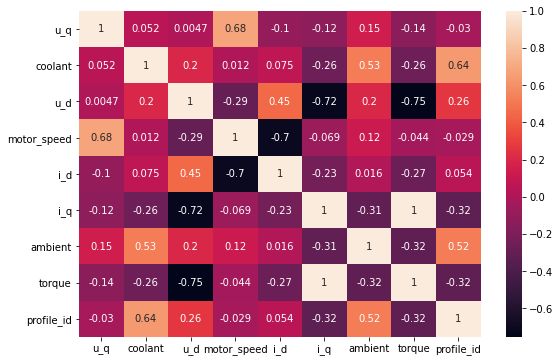

In [9]:
#check for correlation between independent variables
plt.figure(figsize = (9,6))
sns.heatmap(x.corr(),annot = True)

Note:
    
From the above heatmap we can see 'q component of current'(i_q) is highly correlated to torque. We will remove torque because torque is a quantity, which is not reliably measurable in the field applications, such that this feature shall be omitted. 

In [10]:
x = x.drop(columns = ['torque'])

In [11]:
#check number of unique PMSM profile ids
x['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71], dtype=int64)

<AxesSubplot:>

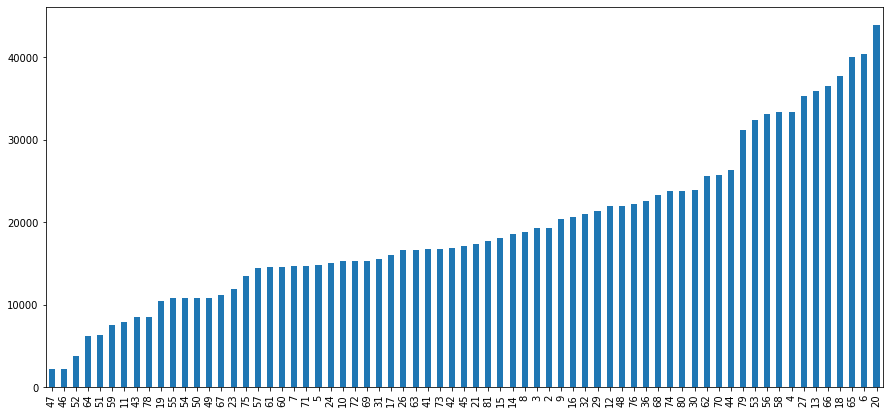

In [12]:
#find the number of records with respect to a profile id
plt.figure(figsize = (15,7))
x['profile_id'].value_counts(ascending = True).plot(kind = 'bar')

Note:  As we can see, profile ids 66, 18, 65, 6 and 20 have the most number of measurements recorded.

In [13]:
x.columns

Index(['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient',
       'profile_id'],
      dtype='object')

Text(0.5, 1.0, 'u_q and coolant')

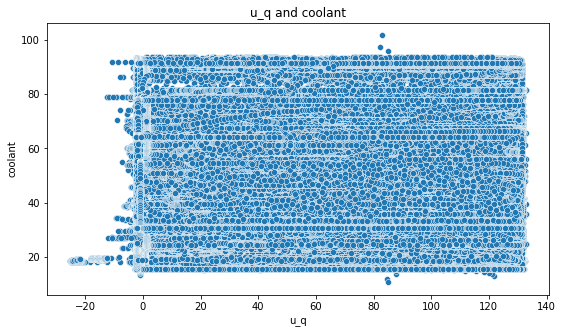

In [14]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = x['u_q'],y = x['coolant'])
plt.title('u_q and coolant')

Text(0.5, 1.0, 'u_q and u_d')

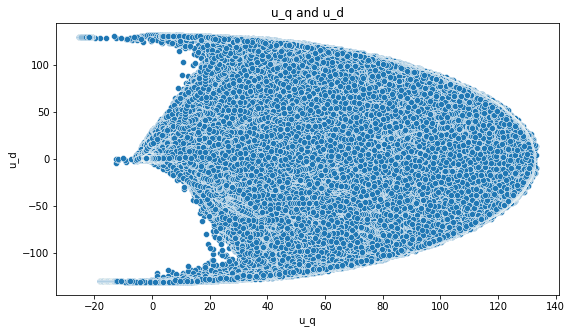

In [15]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = x['u_q'],y = x['u_d'])
plt.title('u_q and u_d')

<AxesSubplot:xlabel='u_q', ylabel='motor_speed'>

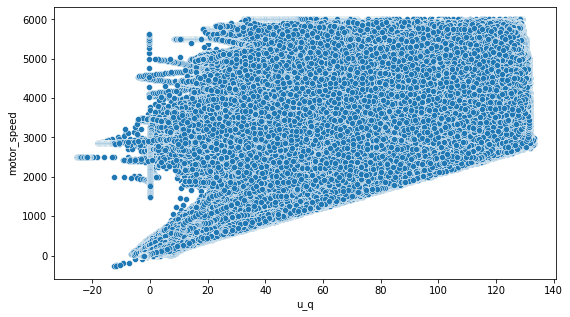

In [16]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = x['u_q'],y = x['motor_speed'])

<AxesSubplot:xlabel='ambient', ylabel='coolant'>

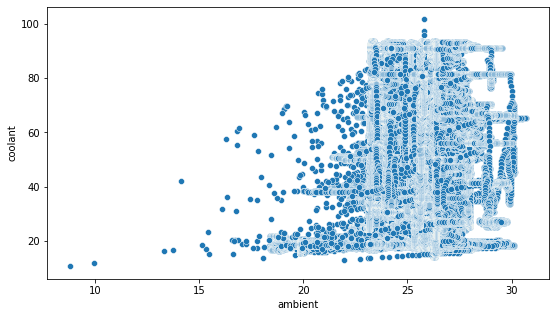

In [17]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = x['ambient'],y = x['coolant'])

<AxesSubplot:xlabel='i_d', ylabel='u_d'>

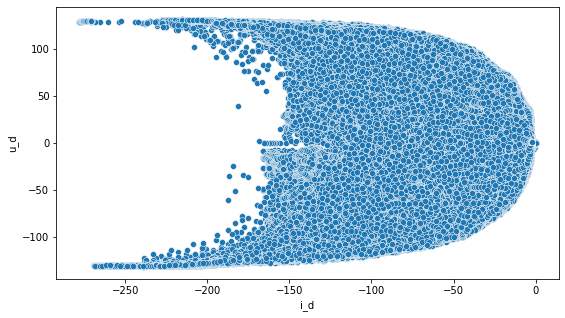

In [18]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = x['i_d'],y = x['u_d'])

<AxesSubplot:xlabel='ambient', ylabel='pm'>

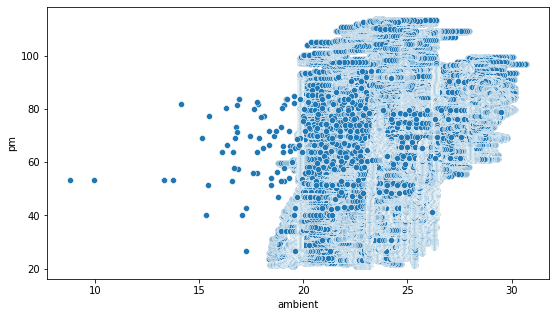

In [19]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = df['ambient'],y = df['pm'])

<AxesSubplot:xlabel='coolant', ylabel='pm'>

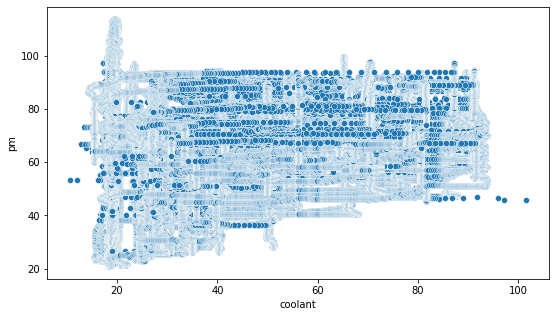

In [20]:
plt.figure(figsize = (9,5))
sns.scatterplot(x = df['coolant'],y = df['pm'])

Note:
    
    From the above visualization we can understand that the data is non-linear in nature, now further in Feature-Engineering we will perform Outlier detection using IQR Approach.

## Feature Engineering

### 1. q-component of voltage(u_q)

<AxesSubplot:xlabel='u_q', ylabel='Density'>

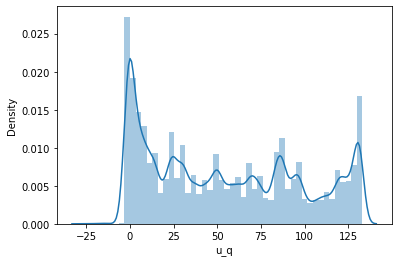

In [21]:
sns.distplot(df['u_q'],bins = 50)

<AxesSubplot:>

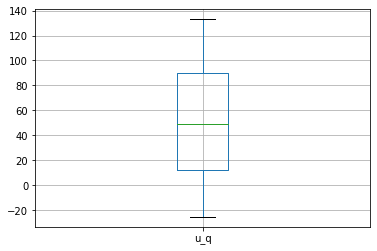

In [22]:
x.boxplot(column = 'u_q')

In [23]:
x['u_q'].describe()

count    1.330816e+06
mean     5.427900e+01
std      4.417323e+01
min     -2.529093e+01
25%      1.206992e+01
50%      4.893818e+01
75%      9.003439e+01
max      1.330370e+02
Name: u_q, dtype: float64

In [24]:
# Calculate IQR
IQR = x['u_q'].quantile(0.75) - x['u_q'].quantile(0.25)
IQR

77.96446806959977

In [25]:
lower_bridge = x['u_q'].quantile(0.25) - (IQR * 1.5)
upper_bridge = x['u_q'].quantile(0.75) + (IQR * 1.5)
print('Lower Bridge: {}'.format(lower_bridge))
print('Upper Bridge: {}'.format(upper_bridge))

Lower Bridge: -104.87677727300928
Upper Bridge: 206.98109500538982


Note:
    The data has no outliers

### 2. Coolant

<AxesSubplot:xlabel='coolant', ylabel='Density'>

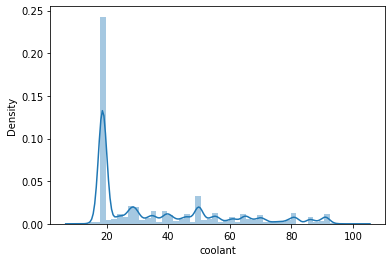

In [26]:
sns.distplot(x['coolant'])

<AxesSubplot:>

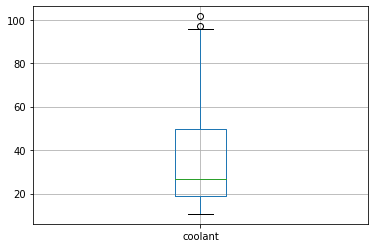

In [27]:
x.boxplot(column = 'coolant')

In [28]:
x['coolant'].describe()

count    1.330816e+06
mean     3.622999e+01
std      2.178615e+01
min      1.062375e+01
25%      1.869814e+01
50%      2.690014e+01
75%      4.985749e+01
max      1.015985e+02
Name: coolant, dtype: float64

In [29]:
IQR = x['coolant'].quantile(0.75) - x['coolant'].quantile(0.25)
IQR

31.159351547539327

In [30]:
lower_bridge = x['coolant'].quantile(0.25) - (IQR * 1.5)
upper_bridge = x['coolant'].quantile(0.75) + (IQR * 1.5 )
print('Lower Bridge: {}'.format(lower_bridge))
print('Upper Bridge: {}'.format(upper_bridge))

Lower Bridge: -28.04089194533243
Upper Bridge: 96.59651424482487


Note: Any datapoint above 96 will be treated as an outliers

### 3. d-component of voltage(u_d)

<AxesSubplot:xlabel='u_d', ylabel='Density'>

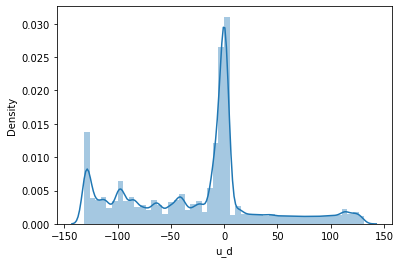

In [31]:
sns.distplot(x['u_d'])

<AxesSubplot:>

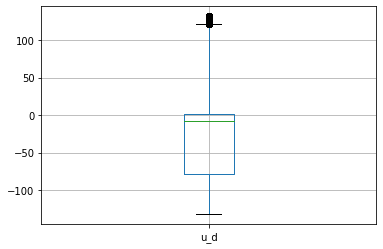

In [32]:
x.boxplot(column = 'u_d')

In [33]:
IQR = x['u_d'].quantile(0.75) - x['u_d'].quantile(0.25)
IQR

80.16117460886946

In [34]:
lower_bridge = x['u_d'].quantile(0.25) - (IQR * 1.5)
upper_bridge = x['u_d'].quantile(0.75) + (IQR * 1.5)
print('Lower Bridge: {}'.format(lower_bridge))
print('Upper Bridge: {}'.format(upper_bridge))

Lower Bridge: -198.93266597788312
Upper Bridge: 121.71203245759473


Note:  Any data point above 121 will be treated as an outlier

### 4. Motor Speed

<AxesSubplot:xlabel='motor_speed', ylabel='Density'>

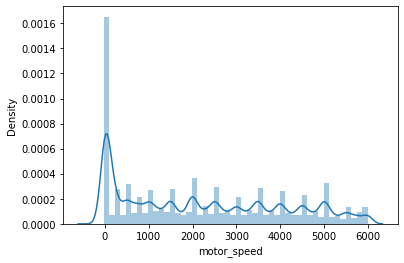

In [35]:
sns.distplot(x['motor_speed'])

<AxesSubplot:>

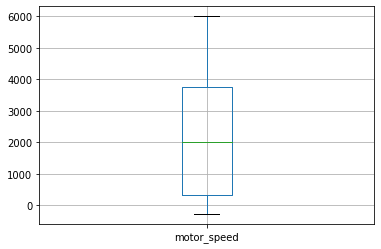

In [36]:
x.boxplot(column = ['motor_speed'])

In [37]:
x['motor_speed'].describe()

count    1.330816e+06
mean     2.202081e+03
std      1.859663e+03
min     -2.755491e+02
25%      3.171107e+02
50%      1.999977e+03
75%      3.760639e+03
max      6.000015e+03
Name: motor_speed, dtype: float64

In [38]:
IQR = x['motor_speed'].quantile(0.75) - x['motor_speed'].quantile(0.25)
IQR

3443.5283935696907

Note: The data has no Outliers

### 5. d-component of current(i_d)

<AxesSubplot:xlabel='i_d', ylabel='Density'>

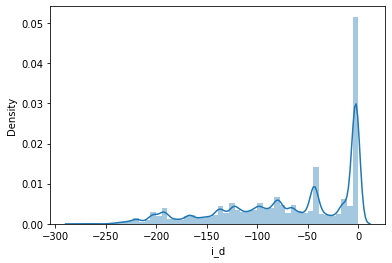

In [39]:
sns.distplot(x['i_d'])

<AxesSubplot:>

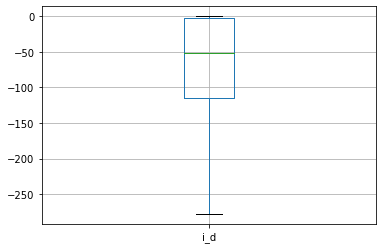

In [40]:
x.boxplot('i_d')

In [41]:
x['i_d'].describe()

count    1.330816e+06
mean    -6.871681e+01
std      6.493323e+01
min     -2.780036e+02
25%     -1.154061e+02
50%     -5.109376e+01
75%     -2.979688e+00
max      5.189670e-02
Name: i_d, dtype: float64

In [42]:
IQR = x['i_d'].quantile(0.75) - x['i_d'].quantile(0.25)
IQR

112.42637179580429

In [43]:
lower_bridge = x['i_d'].quantile(0.25) - (IQR * 1.5)
upper_bridge = x['i_d'].quantile(0.75) + (IQR * 1.5)
print('Lower Bridge: {}'.format(lower_bridge))
print('Upper Bridge: {}'.format(upper_bridge))

Lower Bridge: -284.04561765708274
Upper Bridge: 165.6598695261344


Note: The data has no outliers

### 6. q-component of current(i_q)

<AxesSubplot:xlabel='i_q', ylabel='Density'>

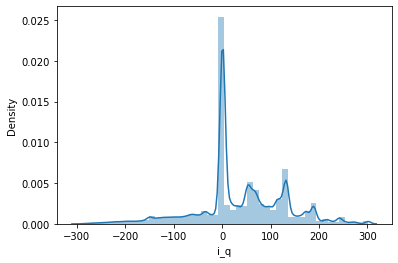

In [44]:
sns.distplot(x['i_q'])

<AxesSubplot:>

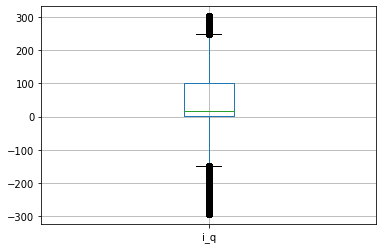

In [45]:
x.boxplot(['i_q'])

In [46]:
IQR = x['i_q'].quantile(0.75) - x['i_q'].quantile(0.25)
IQR

99.51628666507519

In [47]:
lower_bridge = x['i_q'].quantile(0.25) - (IQR * 1.5)
upper_bridge = x['i_q'].quantile(0.75) + (IQR * 1.5)
print('Lower Bridge: {}'.format(lower_bridge))
print('Upper Bridge: {}'.format(upper_bridge))

Lower Bridge: -148.17856715058244
Upper Bridge: 249.88657950971827


Note:
    
    1. Any data point which is greater than 249 will be treated as an outlier
    2. Any data point which is less than -148 will be treated as an outlier

### 7. Ambient

<AxesSubplot:xlabel='ambient', ylabel='Density'>

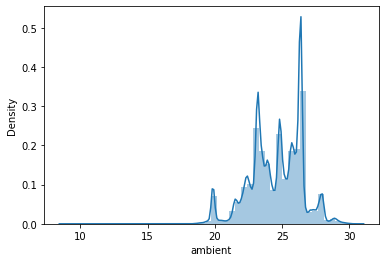

In [48]:
sns.distplot(x['ambient'])

<AxesSubplot:>

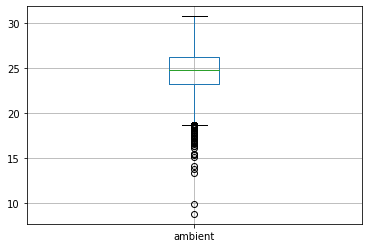

In [49]:
x.boxplot(column = 'ambient')

In [50]:
x['ambient'].describe()

count    1.330816e+06
mean     2.456526e+01
std      1.929522e+00
min      8.783478e+00
25%      2.318480e+01
50%      2.479733e+01
75%      2.621702e+01
max      3.071420e+01
Name: ambient, dtype: float64

In [51]:
IQR = x['ambient'].quantile(0.75) - x['ambient'].quantile(0.25)
IQR

3.032214599789846

In [52]:
lower_bridge = x['ambient'].quantile(0.25) - (IQR * 1.5)
upper_bridge = x['ambient'].quantile(0.75) + (IQR * 1.5)
print('Lower Bridge: {}'.format(lower_bridge))
print('Upper Bridge: {}'.format(upper_bridge))

Lower Bridge: 18.636482539859912
Upper Bridge: 30.765340939019296


Note: Any data point which is less than 18 will be treated as an outlier

## Key observations from all features

1. u_q: The data has no outliers

2. coolant: Any datapoint above 96 will be treated as an outlier

3. u_d: Any data point above 121 will be treated as an outlier

4. motor_speed: The data has no outliers

5. i_d: The data has no outliers

6. i_q:  Any data point which is greater than 249 will be treated as an outlier, Any data point which is less than -148 will be treated as an outlier
        
7. ambient: Any data point which is less than 18 will be treated as an outlier

In [53]:
#Remove the outliers from the dataset
# x = x[(x['coolant'] < 97) & (x['u_d'] < 122) & ((x['i_q'] > -148) & (x['i_q'] < 250)) & (x['ambient'] >= 18)]
df = df[(df['coolant'] < 97) & (df['u_d'] < 122) & ((df['i_q'] > -148) & (df['i_q'] < 250)) & (df['ambient'] >= 18)]

In [54]:
df.shape

(1254064, 13)

In [55]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [56]:
x = df.drop(columns = ['stator_winding','stator_tooth','pm','stator_yoke']) #dropped these columns since they are target features
y = df[['stator_winding','stator_tooth','pm','stator_yoke']]

As profile_id is an id for each measurement session, we can remove it from any furthur analysis and model building.

In [57]:
x.drop(columns = ['profile_id'],inplace = True)

In [58]:
x.shape

(1254064, 8)

## Model Building

In [59]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 20)

### 1. Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth= 30,ccp_alpha = 0.0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=30)

In [61]:
y_pred = dtr.predict(x_test)

#### Model Score, Actual vs Predicted, Cross Validation

In [62]:
# dtr.score(x_test,y_test)
from sklearn.metrics import r2_score
print('Model Score: {}'.format(r2_score(y_test,y_pred)))

Model Score: 0.9819228276879544


In [63]:
y_test.head(1).values

array([[73.44787739, 67.34292607, 72.97858508, 57.5246701 ]])

In [64]:
y_pred[0]

array([73.35603676, 67.39402592, 72.81300431, 57.53685138])

In [65]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits = 5)
cross_validation = cross_val_score(dtr,x_train,y_train,scoring = 'r2',cv = kfold)
cross_validation

array([0.97948816, 0.98003787, 0.97938852, 0.98052257, 0.97972828])

In [66]:
cross_validation.mean()

0.9798330784642744

### 2. K-Nearest Neighbors

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [68]:
y_pred = knn.predict(x_test)

#### Model Score, Actual vs Predicted, Cross Validation

In [69]:
# knn.score(x_test,y_test)
from sklearn.metrics import r2_score
print('Model Score: {}'.format(r2_score(y_test,y_pred)))

Model Score: 0.9379893992042728


In [70]:
y_test.head(1).values

array([[73.44787739, 67.34292607, 72.97858508, 57.5246701 ]])

In [71]:
y_pred[0]

array([78.32812812, 67.9826828 , 69.14336439, 57.15022444])

In [72]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits = 5)
cross_validation = cross_val_score(knn,x_train,y_train,scoring = 'r2',cv = kfold)
cross_validation

array([0.93490067, 0.93499944, 0.93436034, 0.93420701, 0.93447082])

In [73]:
cross_validation.mean()

0.9345876556347548

### 3. Artificial Neural Network

A limitation of multi-output prediction with machine learning is that the relationships between inputs and outputs can be blocky or highly structured based on the training data. Neural network models also support multi-output regression and have the benefit of learning a continuous function that can model a more graceful relationship between changes in input and output. So, I have implemented an Artificial Neural Network for this task.

In [81]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [82]:
print('Number of inputs in the Input Layer',x_train.shape[1])

Number of inputs in the Input Layer 8


In [83]:
print('Number of outputs in the Output Layer',y_train.shape[1])

Number of outputs in the Output Layer 4


In [142]:
#Initialize model
model = Sequential()

#Input Layer
model.add(Dense(6,input_dim = 8,kernel_initializer = 'uniform',activation = 'relu'))

#Hidden Layers
model.add(Dense(12, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(15, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(12, kernel_initializer = 'uniform', activation = 'relu'))


#Output Layer
model.add(Dense(4,activation = 'linear'))

In [143]:
#Compile model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [144]:
#Fitting the model
model.fit(x_train,y_train,epochs = 20,batch_size = 4)

Epoch 1/20
250813/250813 [==============================] - 227s 904us/step - loss: 123.1375 - mae: 7.9556
Epoch 2/20
250813/250813 [==============================] - 230s 915us/step - loss: 104.0367 - mae: 7.1533s - loss: 104.038
Epoch 3/20
250813/250813 [==============================] - 228s 911us/step - loss: 101.6176 - mae: 7.0281
Epoch 4/20
250813/250813 [==============================] - 229s 912us/step - loss: 100.7963 - mae: 6.9836
Epoch 5/20
250813/250813 [==============================] - 229s 914us/step - loss: 100.4041 - mae: 6.9696
Epoch 6/20
250813/250813 [==============================] - 228s 908us/step - loss: 99.8785 - mae: 6.9555
Epoch 7/20
250813/250813 [==============================] - 230s 918us/step - loss: 99.4510 - mae: 6.9399
Epoch 8/20
250813/250813 [==============================] - 230s 916us/step - loss: 98.9389 - mae: 6.9056
Epoch 9/20
250813/250813 [==============================] - 479s 2ms/step - loss: 98.4982 - mae: 6.8771
Epoch 10/20
250813/250813 

In [145]:
model.evaluate(x_test,y_test)

7838/7838 [==============================] - 8s 959us/step - loss: 94.9468 - mae: 6.7533


[94.94681549072266, 6.753334045410156]

#### Actual vs Predicted values

In [146]:
y_pred = model.predict(x_test)

In [147]:
y_test.head().values

array([[ 73.44787739,  67.34292607,  72.97858508,  57.5246701 ],
       [ 75.40262682,  69.03826262,  71.43377546,  61.98971766],
       [100.96212006,  75.48457336,  75.61454773,  52.56981277],
       [ 49.72367477,  42.3134613 ,  47.46491241,  33.31341934],
       [ 26.76678276,  26.34410858,  46.23259354,  23.69634247]])

In [148]:
y_pred[:5]

array([[76.06871 , 65.34633 , 64.08175 , 55.215874],
       [61.51114 , 58.203327, 62.159767, 53.152256],
       [86.813774, 64.34647 , 65.68944 , 43.81063 ],
       [50.915825, 40.96357 , 45.27656 , 31.495752],
       [30.020815, 28.571007, 37.09424 , 25.75175 ]], dtype=float32)

#### Model Score

In [150]:
print('Model Score is: {}'.format(r2_score(y_test,y_pred)))

Model Score is: 0.8189322542178537
